# 2.3 Random Forest models with ClimateWins data

## Contents:

### 1. Importing Libraries and Data
- loading cleaned wx observations from 2.2, and pleasant_wx

### 2. Data Wrangling
- limit to 1 decade at a time to limit model runtime

### 3. Random Forest Model
- plot figures of at least two different trees
- record accuracy of the model

### 4. Create list of the feature importances
- reshape list
- collapse shape into one observation for each wx station

### 5. Bar Chart of Importances against list of Wx stations

### 6. Subset data - Every Year/ 1 Station
- run it for top 3 stations in order of importances

### 7. Random Forrest Model for each Station

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree

In [2]:
# Setting Path 

path = r'/Users/jeremyobach/Documents/Data Analytics/CareerFoundry/Specialization - Machine Learning/Real World Applications of Machine Learning/ML Achievement 2 MASTER FOLDER'
#checking path set correctly
path

'/Users/jeremyobach/Documents/Data Analytics/CareerFoundry/Specialization - Machine Learning/Real World Applications of Machine Learning/ML Achievement 2 MASTER FOLDER'

In [3]:
# delimiting columns displayed
pd.options.display.max_columns = None

In [4]:
pleasant = pd.read_csv (os.path.join(path, '02 Data', 'pleasant_wx_predictions.csv'), index_col = False)

In [5]:
X = pd.read_pickle(os.path.join(path, '02 Data', 'X_cleaned.pkl'))

In [6]:
pleasant.shape

(22950, 16)

In [7]:
X.shape

(22950, 135)

In [8]:
X.head()

,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_cloud_cover,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_pressure,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,SONNBLICK_cloud_cover,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_humidity,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,7,0.85,1.018,0.32,0.09,0.7,6.5,0.8,10.9,1,0.81,1.0195,0.88,0.00,7.0,3.7,-0.9,7.9,4,0.67,1.017,0.44,0.01,2.3,2.4,-0.4,5.1,7,0.85,1.0032,0.07,0.25,0.0,9.3,7.4,11.0,8,0.83,1.0161,0.12,0.08,0.0,10.0,7.0,11.5,7,0.91,1.0010,0.13,0.22,0.0,10.6,9.4,8.3,8,0.82,1.0094,0.28,0.48,1.6,7.9,3.9,9.4,8,1.00,1.0173,0.20,0.00,0.0,-0.6,-1.9,0.5,7,0.83,1.0063,0.22,0.32,1.0,9.5,8.5,11.1,6,0.92,1.0260,0.53,0.0,1.4,7.6,4.4,10.8,5,0.67,1.0304,0.20,0.10,0.0,6.9,1.1,10.4,8,0.98,0.9978,0.04,1.14,0.0,4.9,3.8,5.9,4,0.73,1.0304,0.48,0.01,2.3,-5.9,-8.5,-3.2,5,0.98,1.0114,0.05,0.32,0.0,4.2,2.2,4.9,5,0.88,1.0003,0.45,0.34,4.7,8.5,6.0,10.9
1,6,0.84,1.018,0.36,1.05,1.1,6.1,3.3,10.1,6,0.84,1.0172,0.25,0.00,0.0,2.9,2.2,4.4,4,0.67,1.017,0.18,0.31,0.0,2.3,1.4,3.1,8,0.90,1.0056,0.14,0.06,0.1,7.7,6.4,8.3,8,0.89,1.0161,0.18,0.66,0.5,8.2,7.4,11.0,7,0.98,1.0051,0.13,0.23,0.0,6.1,3.9,10.6,6,0.86,1.0086,0.12,0.27,0.0,7.7,6.8,9.1,6,0.94,1.0173,0.56,0.13,3.2,2.1,-1.3,5.5,8,0.92,1.0062,0.17,1.34,0.4,8.6,7.5,9.9,7,0.86,1.0254,0.46,0.0,0.9,9.8,7.4,12.2,6,0.72,1.0292,0.61,0.30,5.1,6.2,4.2,10.2,8,0.62,1.0139,0.04,0.00,0.0,3.4,2.8,4.9,6,0.97,1.0292,0.21,0.61,0.0,-9.5,-10.5,-8.5,5,0.62,1.0114,0.05,0.06,0.0,4.0,3.0,5.0,7,0.91,1.0007,0.25,0.84,0.7,8.9,5.6,12.1
2,8,0.90,1.018,0.18,0.30,0.0,8.5,5.1,9.9,6,0.77,1.0179,0.67,0.00,3.5,3.1,-0.5,6.4,4,0.67,1.017,0.30,0.00,0.6,2.7,1.7,5.3,6,0.92,1.0165,0.28,0.0

### 2. Data Wrangling
For this notebook version:
- 1 wx station, all years

In [9]:
keep = list(x for x in X.columns if not x.find('BASEL') >=0)
#Create a list of the data that doesn't contain the weather station name above.
keep.sort()
keep

['BELGRADE_cloud_cover',
 'BELGRADE_global_radiation',
 'BELGRADE_humidity',
 'BELGRADE_precipitation',
 'BELGRADE_pressure',
 'BELGRADE_sunshine',
 'BELGRADE_temp_max',
 'BELGRADE_temp_mean',
 'BELGRADE_temp_min',
 'BUDAPEST_cloud_cover',
 'BUDAPEST_global_radiation',
 'BUDAPEST_humidity',
 'BUDAPEST_precipitation',
 'BUDAPEST_pressure',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_max',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'DEBILT_cloud_cover',
 'DEBILT_global_radiation',
 'DEBILT_humidity',
 'DEBILT_precipitation',
 'DEBILT_pressure',
 'DEBILT_sunshine',
 'DEBILT_temp_max',
 'DEBILT_temp_mean',
 'DEBILT_temp_min',
 'DUSSELDORF_cloud_cover',
 'DUSSELDORF_global_radiation',
 'DUSSELDORF_humidity',
 'DUSSELDORF_precipitation',
 'DUSSELDORF_pressure',
 'DUSSELDORF_sunshine',
 'DUSSELDORF_temp_max',
 'DUSSELDORF_temp_mean',
 'DUSSELDORF_temp_min',
 'HEATHROW_cloud_cover',
 'HEATHROW_global_radiation',
 'HEATHROW_humidity',
 'HEATHROW_precipitation',
 'HEATHROW_pressure',
 'HEATHROW_sun

In [10]:
#Create an 'X' matrix by dropping the unneeded columns. One weather station, full time period.
X2 = X.drop(keep, axis=1)
#y = df_keyyear.drop(['DATE'], axis=1)
X2

,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max
0,7,0.85,1.0180,0.32,0.09,0.7,6.5,0.8,10.9
1,6,0.84,1.0180,0.36,1.05,1.1,6.1,3.3,10.1
2,8,0.90,1.0180,0.18,0.30,0.0,8.5,5.1,9.9
3,3,0.92,1.0180,0.58,0.00,4.1,6.3,3.8,10.6
4,6,0.95,1.0180,0.65,0.14,5.4,3.0,-0.7,6.0
...,...,...,...,...,...,...,...,...,...
22945,1,0.79,1.0248,1.34,0.22,7.7,15.9,11.4,21.4
22946,6,0.77,1.0244,1.34,0.22,5.4,16.7,14.3,21.9
22947,4,0.76,1.0227,1.34,0.22,6.1,16.7,13.1,22.4
22948,5,0.80,1.0212,1.34,0.22,5.8,15.4,11.6,21.1


In [11]:
y2 = pleasant['BASEL_pleasant_weather']
y2

0        0
1        0
2        0
3        0
4        0
        ..
22945    0
22946    0
22947    0
22948    0
22949    0
Name: BASEL_pleasant_weather, Length: 22950, dtype: int64

In [12]:
X2.shape

(22950, 9)

In [13]:
y2.shape

(22950,)

In [14]:
# turning X2 and y2 from a df to arrays (X and y)

X = np.array(X2)
y = np.array(y2)

In [15]:
# verifying array shape

X

array([[ 7.    ,  0.85  ,  1.018 , ...,  6.5   ,  0.8   , 10.9   ],
       [ 6.    ,  0.84  ,  1.018 , ...,  6.1   ,  3.3   , 10.1   ],
       [ 8.    ,  0.9   ,  1.018 , ...,  8.5   ,  5.1   ,  9.9   ],
       ...,
       [ 4.    ,  0.76  ,  1.0227, ..., 16.7   , 13.1   , 22.4   ],
       [ 5.    ,  0.8   ,  1.0212, ..., 15.4   , 11.6   , 21.1   ],
       [ 5.    ,  0.84  ,  1.0193, ..., 13.5   ,  9.9   , 19.2   ]])

In [16]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [17]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.20, random_state = 38)

In [18]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(18360, 9) (18360,)
(4590, 9) (4590,)


In [19]:
y_train

array([1, 0, 0, ..., 0, 1, 0])

In [20]:
X_train

array([[  6.    ,   0.78  ,   1.018 , ...,  14.5   ,   8.2   ,  22.3   ],
       [  6.    ,   0.64  ,   1.0159, ...,  15.1   ,  11.5   ,  18.4   ],
       [  8.    ,   0.9   ,   1.018 , ...,   2.4   ,   1.    ,   2.8   ],
       ...,
       [  8.    ,   0.84  ,   1.018 , ...,  -7.2   , -10.5   ,  -5.1   ],
       [  6.    ,   0.81  ,   1.023 , ...,  14.2   ,   9.5   ,  20.6   ],
       [  6.    ,   0.8   ,   1.0193, ...,   4.3   ,   1.9   ,   7.8   ]])

In [21]:
X_test

array([[ 8.    ,  0.99  ,  1.018 , ..., -0.8   , -2.9   ,  2.7   ],
       [ 5.    ,  0.65  ,  1.0153, ...,  9.3   ,  3.4   , 14.7   ],
       [ 6.    ,  0.83  ,  1.02  , ...,  7.2   ,  5.3   , 10.1   ],
       ...,
       [ 8.    ,  0.62  ,  1.0245, ..., 10.3   ,  8.2   , 12.8   ],
       [ 2.    ,  0.65  ,  1.0165, ..., 20.2   , 15.1   , 25.5   ],
       [ 8.    ,  0.78  ,  1.015 , ...,  7.8   ,  6.1   ,  9.5   ]])

In [22]:
y_test

array([0, 0, 0, ..., 0, 1, 0])

### 3. Random Forest Model

In [23]:
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100) #, max_depth = 5)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

RandomForestClassifier()

In [24]:
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
  
# using metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  1.0


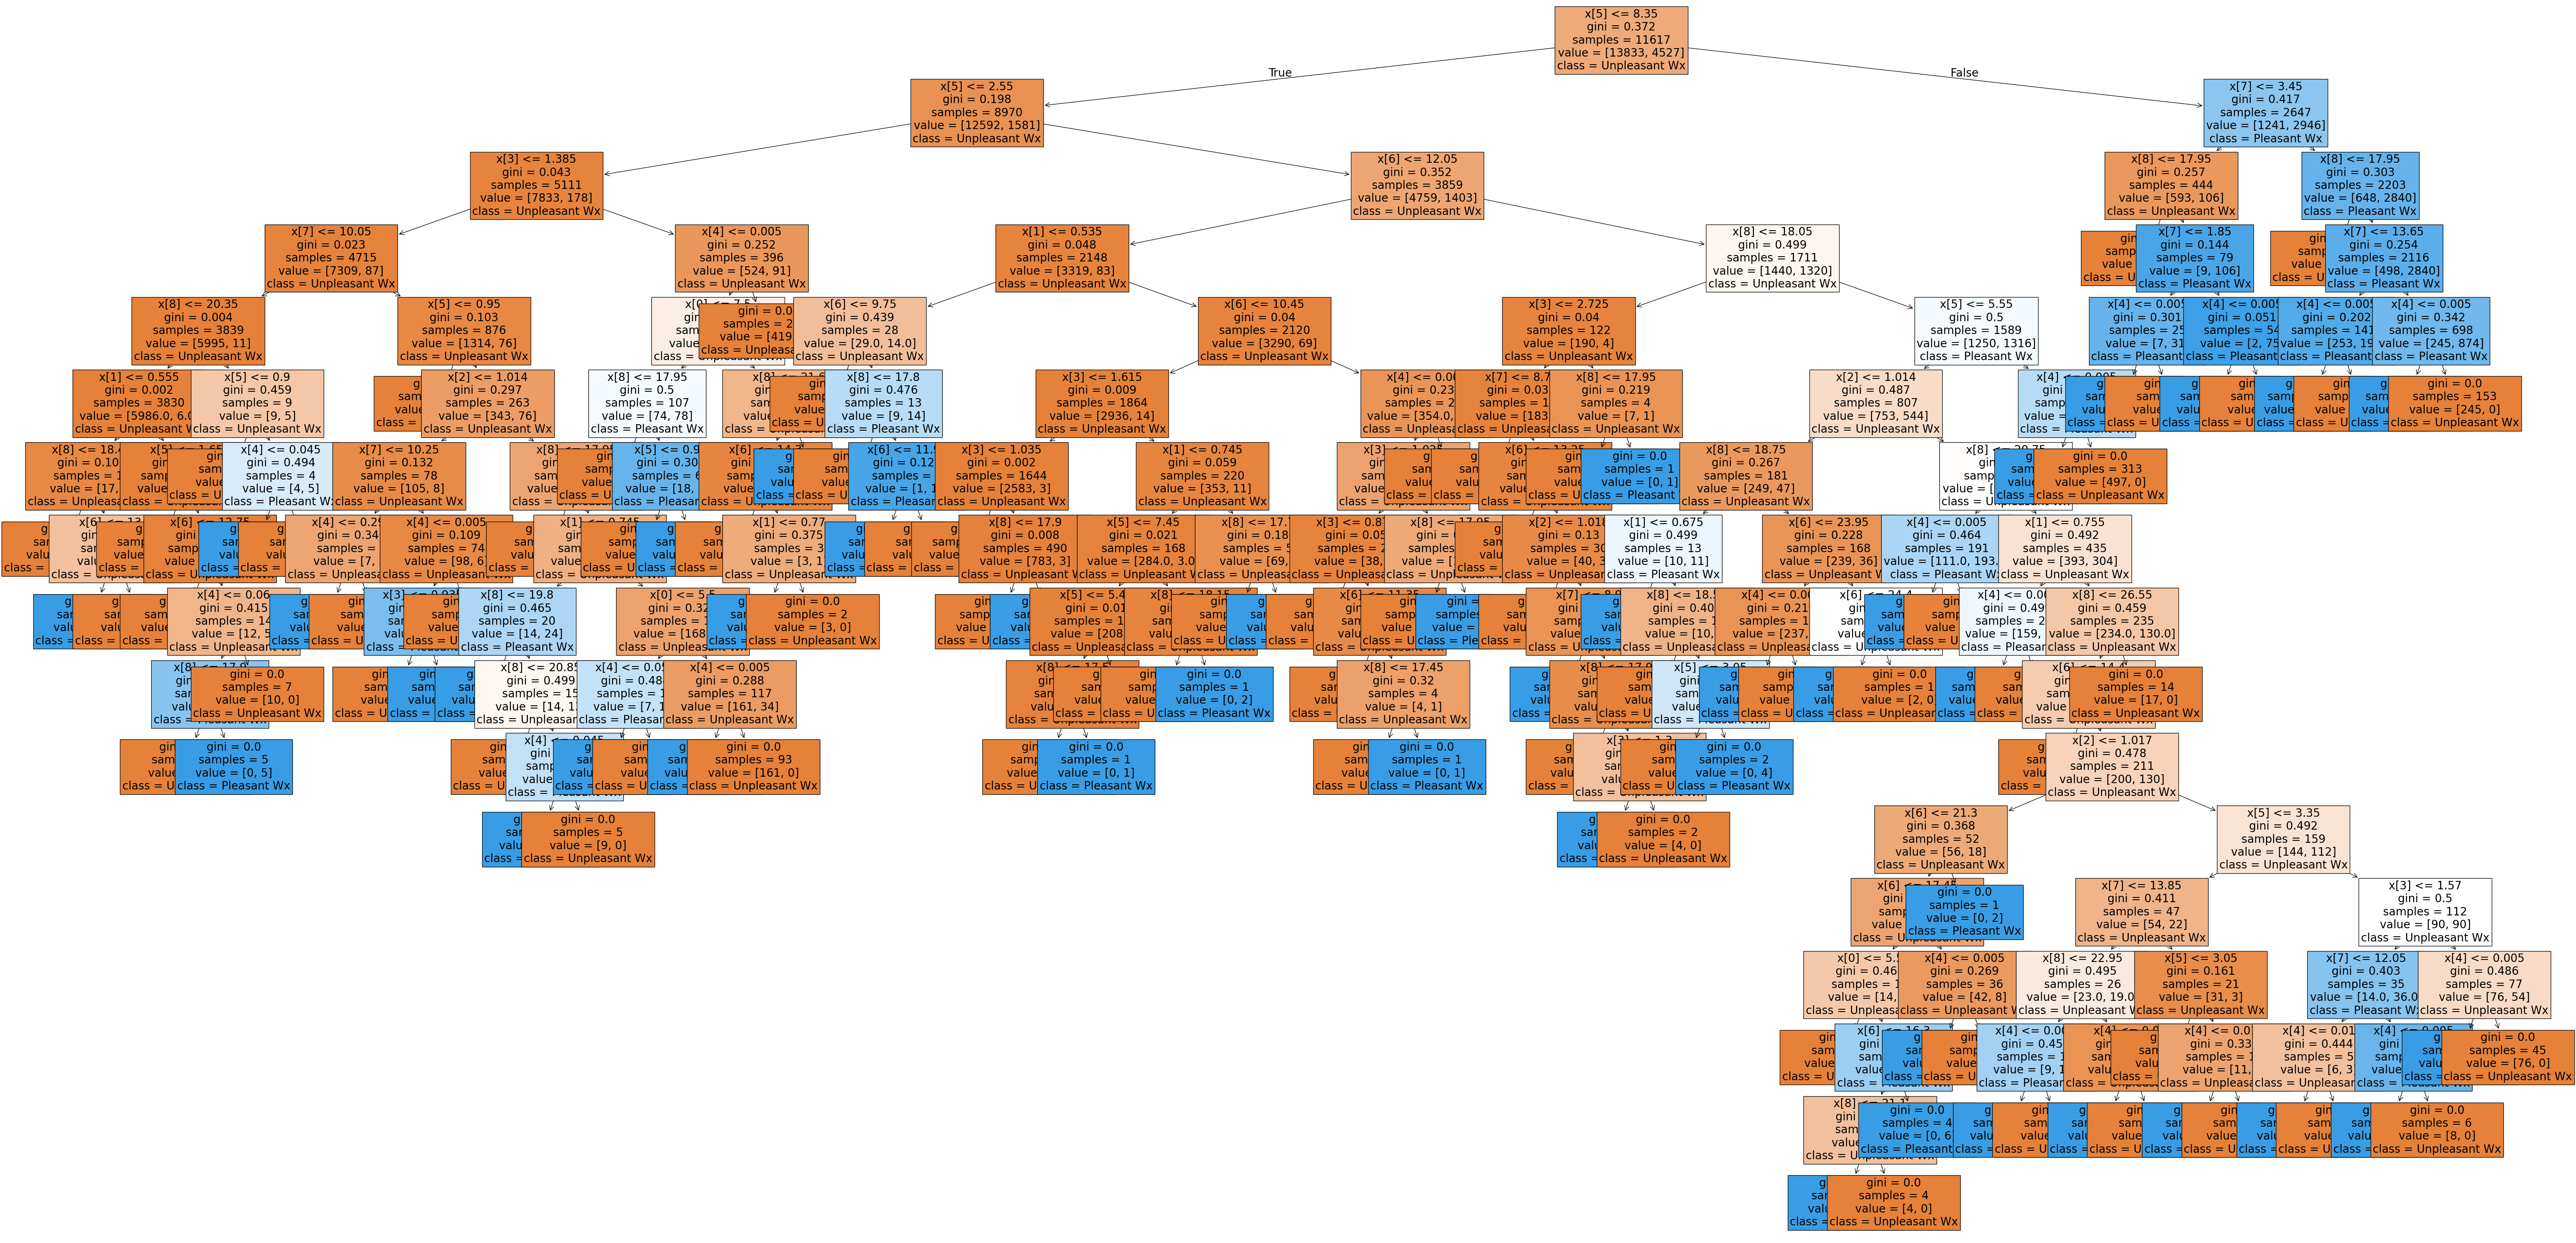

In [25]:
types = {0:'Unpleasant Wx', 1:'Pleasant Wx'}

fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[5], fontsize = 20, class_names=types, filled=True);

### 4. Relative importance of Factors

In [26]:
np.set_printoptions(threshold=np.inf)
newarray = clf.feature_importances_
#print(clf.feature_importances_.shape)
newarray

array([0.02361239, 0.00854201, 0.00840354, 0.10718096, 0.34699763,
       0.11530643, 0.0992738 , 0.03407054, 0.2566127 ])

In [27]:
np.set_printoptions(threshold=1000)

In [30]:
station1 = list(x for x in X2.columns if x.find('BASEL') >=0)
#Basel.sort()
station1

['BASEL_cloud_cover',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max']

In [31]:
newarray = pd.Series(newarray, index = station1) #.sort_values(ascending = False)
newarray

BASEL_cloud_cover         0.023612
BASEL_humidity            0.008542
BASEL_pressure            0.008404
BASEL_global_radiation    0.107181
BASEL_precipitation       0.346998
BASEL_sunshine            0.115306
BASEL_temp_mean           0.099274
BASEL_temp_min            0.034071
BASEL_temp_max            0.256613
dtype: float64

['BASEL_cloud_cover', 'BASEL_humidity', 'BASEL_pressure', 'BASEL_global_radiation', 'BASEL_precipitation', 'BASEL_sunshine', 'BASEL_temp_mean', 'BASEL_temp_min', 'BASEL_temp_max']


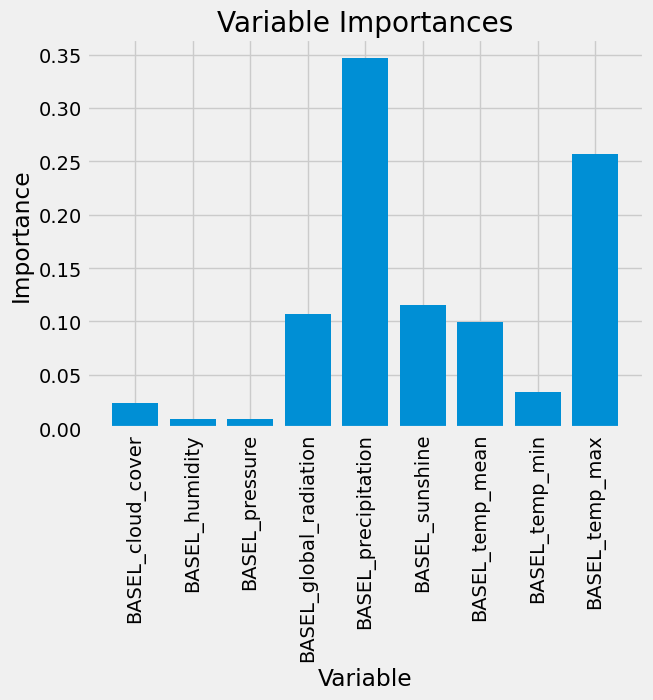

In [32]:
%matplotlib inline

plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(newarray)))
print(station1)

plt.bar(x_values, newarray, orientation = 'vertical')
plt.xticks(x_values, station1, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');